In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from seaborn import countplot
from imblearn.over_sampling import SMOTE

In [2]:
train = pd.read_csv("/Users/viralpandey/Downloads/Data/quora-insincere-questions-classification/train.csv")
test = pd.read_csv("/Users/viralpandey/Downloads/Data/quora-insincere-questions-classification/test.csv")

In [3]:
train, val = train_test_split(train, test_size=0.1, random_state=2018)

# Class Imbalance

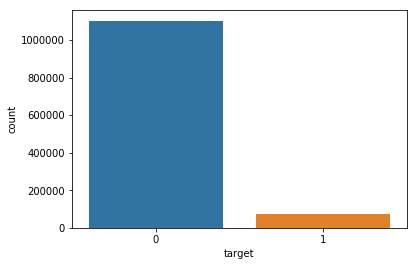

In [4]:
sns_plot=countplot(x="target", data=train)

In [5]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


# Extract target values

In [6]:
y_train = train['target'].values
y_val = val['target'].values

# Tokenize the train and val data

In [7]:
tokenize = Tokenizer(num_words = 50000)
tokenize.fit_on_texts(train['question_text'])
x_train = tokenize.texts_to_sequences(train['question_text'])
x_val = tokenize.texts_to_sequences(val['question_text'])

# Padding for equal length

In [8]:
x_train = pad_sequences(x_train, maxlen=50, padding='post', truncating='post')
x_val = pad_sequences(x_val, maxlen=50, padding='post', truncating='post')

# Performing SMOTE

In [9]:
smt = SMOTE(sampling_strategy=1)
x_smote, y_smote = smt.fit_sample(x_train, y_train)

Balanced Class after SMOTE


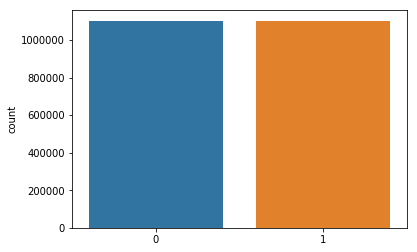

In [17]:
countplot(y_smote)
print("Balanced Class after SMOTE")